In [1]:
import numpy as np
import pandas as pd
import openturns as ot
import openturns.viewer as viewer
import math
from matplotlib import pylab as plt

In [2]:
import modelib

In [3]:
#fp = 'small_ints.txt'
# for histogram in openturns, don't give counts
# giv raw sizes
fp = 'arch/data/intron.txt'
data = modelib.get_intbins(fp, 500, 5)[2]
print(data)

FileNotFoundError: [Errno 2] No such file or directory: 'arch/data/intron.txt'

In [14]:
# trying to use openturns
# https://openturns.discourse.group/t/help-with-reading-in-experimental-data-text-or-csv-file/135
# https://stackoverflow.com/questions/52455797/python-fitting-a-gev-distribution-from-these-values

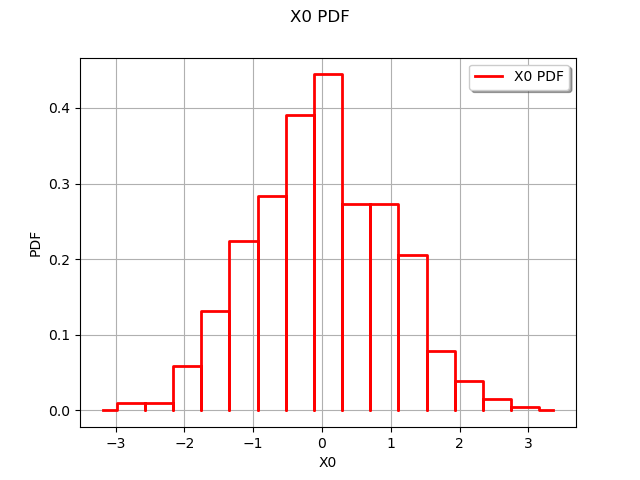

In [15]:
size = 500
normal = ot.Normal(1)
sample = normal.getSample(size)
ot.HistogramFactory().build(sample).drawPDF()

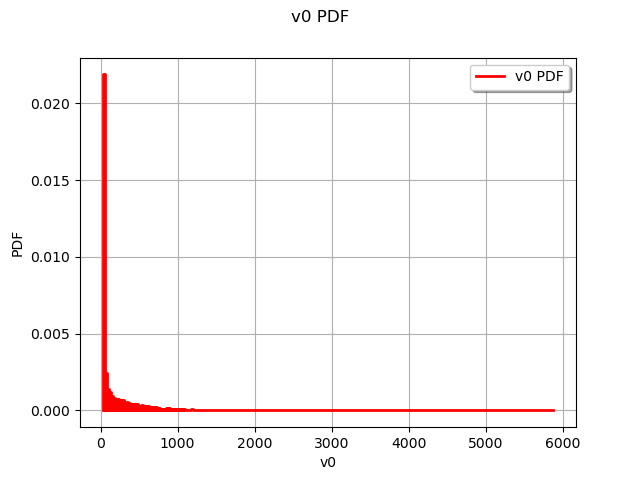

In [16]:
sample = ot.Sample([[x] for x in data])
# needs raw data as input, makes the histogram for you
# i was giving a histogram to a histogram making method...
ot.HistogramFactory().build(sample).drawPDF()

In [17]:
# this may explain pdfs
# https://plotly.com/chart-studio-help/histogram/
# https://www.statisticshowto.com/extreme-value-distribution/


In [21]:
max_precip = [9.4, 38.0, 12.5, 35.3, 17.6, 12.9, 12.4, 19.6, 15.0, 13.2, 12.3, 16.9, 16.9, 29.4, 13.6, 11.1, 8.0, 16.6, 12.0, 13.1, 9.1, 9.7, 21.0, 11.2, 14.4, 18.8, 14.0, 19.9, 12.4, 10.8, 21.6, 15.4, 17.4, 14.8, 22.7, 11.5, 10.5, 11.8, 12.4, 16.6, 11.7, 12.9, 17.8]
sample = ot.Sample([[f] for f in data])
gev = ot.GeneralizedExtremeValueFactory().buildAsGeneralizedExtremeValue(sample)
print(gev)

GeneralizedExtremeValue(mu=55.9286, sigma=24.541, xi=1.35926)


[<Axes: xlabel='X0', ylabel='PDF'>]


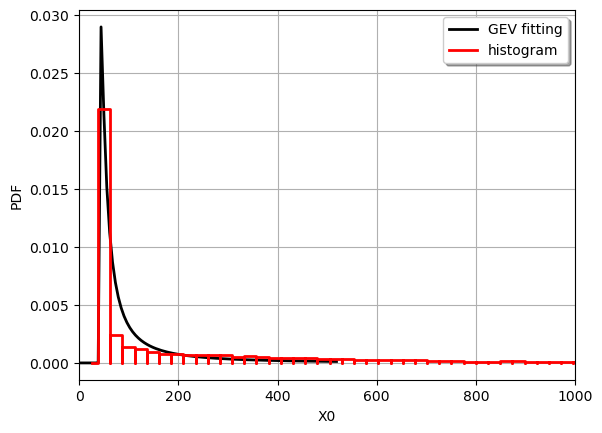

In [23]:
graph = gev.drawPDF()
graph.add(ot.HistogramFactory().build(sample).drawPDF())
graph.setColors(["black", "red"])
graph.setLegends(["GEV fitting", "histogram"])
graph.setLegendPosition("topright")

view = viewer.View(graph)
axes = view.getAxes()
print(axes)
_ = axes[0].set_xlim(0, 1000)
# does not look good, what if you used smoothed data?

In [28]:
dist1 = ot.GeneralizedExtremeValue(1.0, 2.0, -0.2)
myFrechet = ot.Frechet(1.0, 2.0, 3.0)
dist1 = ot.GeneralizedExtremeValue(myFrechet)
print(myFrechet)
print(dist1)

Frechet(beta = 1, alpha = 2, gamma = 3)
GeneralizedExtremeValue(mu=4, sigma=0.5, xi=0.5)


In [30]:
sample = dist1.getSample(5)
print(sample)

    [ X0      ]
0 : [ 4.67997 ]
1 : [ 3.70978 ]
2 : [ 6.30461 ]
3 : [ 5.1214  ]
4 : [ 4.30703 ]


In [31]:
sample1 = gev.getSample(5)
print(sample1)
# what does getting a sample mean?

    [ X0       ]
0 : [  67.7697 ]
1 : [  58.5681 ]
2 : [ 120.398  ]
3 : [ 242.19   ]
4 : [  54.1761 ]
